In [1]:
import pandas as pd
df_ids = pd.read_csv('inflation_ids_fred.csv').set_index('id')
df_ids.head()

,name,Country,Region
id,,,
CPGRLE01AUQ657N,Consumer Price Index: OECD Groups: All Items N...,Australia,APAC
CPGRLE01CAQ657N,Consumer Price Index: OECD Groups: All Items N...,Canada,Americas
CPGRLE01CHQ657N,Consumer Price Index: OECD Groups: All Items N...,Switzerland,Europe
CPGRLE01DEQ657N,Consumer Price Index: OECD Groups: All Items N...,Germany,Europe
CPGRLE01ESQ657N,Consumer Price Index: OECD Groups: All Items N...,Spain,Europe


In [2]:
import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath('"Top 10 Funds by AUM Positioning - Data Gen.ipynb"')))))
from apis.misc.utils import get_fred_series


Python-dotenv could not parse statement starting at line 5


In [3]:
df=pd.DataFrame()
for id in list(df_ids.index.to_list()):
    df = pd.concat([df,get_fred_series(id,start_date='20000101',end_date='20230701',frequency='q')],axis=1)

df

,CPGRLE01AUQ657N,CPGRLE01CAQ657N,CPGRLE01CHQ657N,CPGRLE01DEQ657N,CPGRLE01ESQ657N,CPGRLE01FIQ657N,CPGRLE01FRQ657N,CPGRLE01GBQ657N,CPGRLE01GRQ657N,CPGRLE01ILQ657N,CPGRLE01ITQ657N,CPGRLE01JPQ657N,CPGRLE01KRQ657N,CPGRLE01MXQ657N,CPGRLE01NLQ657N,CPGRLE01NZQ657N,CPGRLE01PLQ657N,CPGRLE01TRQ657N,CPGRLE01USQ657N
2000-01-01,0.685770,0.104092,0.093359,0.175845,0.827181,0.618000,0.051470,-0.817204,-1.106693,-1.372896,0.420044,-0.726107,0.938865,3.306809,-0.511162,1.911027,1.271776,13.403366,0.729108
2000-04-01,0.560448,0.703632,-0.117025,-0.137622,0.992677,0.998617,0.335341,0.693842,2.357059,0.898069,0.479525,0.348098,0.471226,1.794041,1.105527,0.799571,0.401957,8.008255,0.742390
2000-07-01,4.181549,0.636548,0.062804,0.409582,1.191453,0.354077,0.121935,-0.387597,-0.893364,-0.044504,0.447192,-0.237272,0.667760,1.472128,0.246096,0.902537,0.542403,8.119938,0.460575
2000-10-01,0.186907,0.415889,0.296695,0.138799,0.356935,1.078454,0.221609,0.778210,2.756393,-0.311665,0.579562,-0.249770,0.597860,2.157300,0.962086,1.142747,0.371467,9.511724,0.605171
2001-01-01,0.807286,0.221883,0.461943,0.405077,1.061118,0.447855,0.132904,-0.600601,-0.713742,-0.401965,0.875895,-0.784445,1.586164,1.983280,0.826038,-0.426546,0.572250,8.290505,0.838498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,1.669863,1.981011,0.927857,1.706805,2.799993,1.683439,1.523219,1.826087,3.315203,1.604096,1.239532,NaN,1.056463,1.633080,1.990431,1.316925,0.966667,12.952139,1.699407
2022-07-01,1.721293,1.359761,0.218460,1.203607,0.157200,1.243204,0.927396,1.366354,0.213740,1.813907,1.487923,NaN,1.003984,1.596055,1.905512,2.340358,0.933333,10.241672,1.507234
2022-10-01,1.928516,0.679199,0.102680,1.465134,1.594837,1.786091,0.235008,1.516428,2.992511,0.989772,0.543153,NaN,0.719470,1.423119,1.366866,2.054920,0.766667,8.281189,0.870896
2023-01-01,1.157661,0.795998,0.671650,1.262495,0.518958,1.642114,0.779292,0.746888,-0.367767,0.632075,1.326336,NaN,1.178019,1.718010,1.044924,0.881589,1.166667,12.329646,1.381603


In [4]:
df_arc = df.copy()

In [85]:
df  = df_arc.reset_index()
# convert date to datetime
df['date'] = pd.to_datetime(df['index'])
df = df.set_index('date').drop(columns = ['index'])
df

,CPGRLE01AUQ657N,CPGRLE01CAQ657N,CPGRLE01CHQ657N,CPGRLE01DEQ657N,CPGRLE01ESQ657N,CPGRLE01FIQ657N,CPGRLE01FRQ657N,CPGRLE01GBQ657N,CPGRLE01GRQ657N,CPGRLE01ILQ657N,CPGRLE01ITQ657N,CPGRLE01JPQ657N,CPGRLE01KRQ657N,CPGRLE01MXQ657N,CPGRLE01NLQ657N,CPGRLE01NZQ657N,CPGRLE01PLQ657N,CPGRLE01TRQ657N,CPGRLE01USQ657N
date,,,,,,,,,,,,,,,,,,,
2000-01-01,0.685770,0.104092,0.093359,0.175845,0.827181,0.618000,0.051470,-0.817204,-1.106693,-1.372896,0.420044,-0.726107,0.938865,3.306809,-0.511162,1.911027,1.271776,13.403366,0.729108
2000-04-01,0.560448,0.703632,-0.117025,-0.137622,0.992677,0.998617,0.335341,0.693842,2.357059,0.898069,0.479525,0.348098,0.471226,1.794041,1.105527,0.799571,0.401957,8.008255,0.742390
2000-07-01,4.181549,0.636548,0.062804,0.409582,1.191453,0.354077,0.121935,-0.387597,-0.893364,-0.044504,0.447192,-0.237272,0.667760,1.472128,0.246096,0.902537,0.542403,8.119938,0.460575
2000-10-01,0.186907,0.415889,0.296695,0.138799,0.356935,1.078454,0.221609,0.778210,2.756393,-0.311665,0.579562,-0.249770,0.597860,2.157300,0.962086,1.142747,0.371467,9.511724,0.605171
2001-01-01,0.807286,0.221883,0.461943,0.405077,1.061118,0.447855,0.132904,-0.600601,-0.713742,-0.401965,0.875895,-0.784445,1.586164,1.983280,0.826038,-0.426546,0.572250,8.290505,0.838498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,1.669863,1.981011,0.927857,1.706805,2.799993,1.683439,1.523219,1.826087,3.315203,1.604096,1.239532,NaN,1.056463,1.633080,1.990431,1.316925,0.966667,12.952139,1.699407
2022-07-01,1.721293,1.359761,0.218460,1.203607,0.157200,1.243204,0.927396,1.366354,0.213740,1.813907,1.487923,NaN,1.003984,1.596055,1.905512,2.340358,0.933333,10.241672,1.507234
2022-10-01,1.928516,0.679199,0.102680,1.465134,1.594837,1.786091,0.235008,1.516428,2.992511,0.989772,0.543153,NaN,0.719470,1.423119,1.366866,2.054920,0.766667,8.281189,0.870896


In [86]:
df_ind=(df/100 + 1).cumprod()

In [87]:
df_ind = df_ind.transpose()
df_ind.index.name = "id"

In [88]:
df = df_ids.join(df_ind).reset_index().set_index(['Country'])
df.head()

,id,name,Region,2000-01-01 00:00:00,2000-04-01 00:00:00,2000-07-01 00:00:00,2000-10-01 00:00:00,2001-01-01 00:00:00,2001-04-01 00:00:00,2001-07-01 00:00:00,...,2021-01-01 00:00:00,2021-04-01 00:00:00,2021-07-01 00:00:00,2021-10-01 00:00:00,2022-01-01 00:00:00,2022-04-01 00:00:00,2022-07-01 00:00:00,2022-10-01 00:00:00,2023-01-01 00:00:00,2023-04-01 00:00:00
Country,,,,,,,,,,,,,,,,,,,,,
Australia,CPGRLE01AUQ657N,Consumer Price Index: OECD Groups: All Items N...,APAC,1.006858,1.012501,1.054839,1.056810,1.065342,1.073251,1.080030,...,1.601473,1.607113,1.617273,1.636829,1.661635,1.689382,1.718461,1.751602,1.771880,1.788155
Canada,CPGRLE01CAQ657N,Consumer Price Index: OECD Groups: All Items N...,Americas,1.001041,1.008085,1.014502,1.018721,1.020981,1.030939,1.038188,...,1.429033,1.444263,1.459183,1.468809,1.488968,1.518465,1.539112,1.549566,1.561900,1.583234
Switzerland,CPGRLE01CHQ657N,Consumer Price Index: OECD Groups: All Items N...,Europe,1.000934,0.999762,1.000390,1.003358,1.007993,1.012089,1.010924,...,1.062072,1.068069,1.068300,1.072535,1.077100,1.087094,1.089469,1.090587,1.097912,1.104971
Germany,CPGRLE01DEQ657N,Consumer Price Index: OECD Groups: All Items N...,Europe,1.001758,1.000380,1.004477,1.005871,1.009946,1.013088,1.018160,...,1.282996,1.294286,1.305794,1.312427,1.319941,1.342470,1.358628,1.378533,1.395937,1.416327
Spain,CPGRLE01ESQ657N,Consumer Price Index: OECD Groups: All Items N...,Europe,1.008272,1.018281,1.030413,1.034091,1.045064,1.055572,1.065384,...,1.387857,1.410167,1.399446,1.425673,1.420851,1.460635,1.462931,1.486262,1.493975,1.524495


In [89]:
df_temp = df.iloc[:,3:].stack()

In [90]:
df_f = pd.DataFrame(df_temp.rename('cpi_indexed')).join(df[['id','Region']],how='left')

In [48]:
df = pd.read_csv('../../data/Inflation/full_country_inflation_data.csv').set_index(['date','Country'])
df

id         cpi  \
date       Country                                        
2000-01-01 Austria          CPGRLE01ATQ657N  100.000000   
           Australia        CPGRLE01AUQ657N  100.000000   
           Belgium          CPGRLE01BEQ657N  100.000000   
           Canada           CPGRLE01CAQ657N  100.000000   
           Switzerland      CPGRLE01CHQ657N  100.000000   
...                                     ...         ...   
2023-04-01 Sweden           CPGRLE01SEQ657N -399.881046   
           Slovenia         CPGRLE01SIQ657N  272.368394   
           Slovak Republic  CPGRLE01SKQ657N   47.987980   
           Turkey           CPGRLE01TRQ657N   69.211544   
           United States    CPGRLE01USQ657N  187.436522   

                                                                         name  \
date       Country                                                              
2000-01-01 Austria          Consumer Price Index: OECD Groups: All Items N...   
           Australia        Consumer Price Index: OECD Groups: All Items N...   
           Belgium          Consumer Price Index: OECD Groups: All Items N...   
           Canada           Consumer Price Index: OECD Groups: All Items N...   
           Switzerland      Consumer Price Index: OECD Groups: All Items N...   
...                                                                       ...   
2023-04-01 Sweden           Consumer Price Index: OECD Groups: All Items N...   
           Slovenia         Consumer Price Index: OECD Groups: All Items N...   
           Slovak Republic  Consumer Price Index: OECD Groups: All Items N...   
           Turkey           Consumer Price Index: OECD Groups: All Items N...   
           United States    Consumer Price Index: OECD Groups: All Items N...   

                              Region  
date       Country                    
2000-01-01 Austria            Europe  
           Australia            APAC  
           Belgium            Europe  
           Canada           Americas  
           Switzerland        Europe  
...                              ...  
2023-04-01 Sweden             Europe  
           Slovenia           Europe  
           Slovak Republic    Europe  
           Turkey             Europe  
           United States    Americas  

[3097 rows x 4 columns]

In [ ]:
df=df[df['id'].isin(df_ids.index.to_list())]

In [76]:
df_f.reset_index()

,Country,level_1,cpi_indexed,Region
0,Australia,2000-01-01,1.006858,APAC
1,Australia,2000-04-01,1.012501,APAC
2,Australia,2000-07-01,1.054839,APAC
3,Australia,2000-10-01,1.056810,APAC
4,Australia,2001-01-01,1.065342,APAC
...,...,...,...,...
1776,United States,2022-04-01,1.641488,Americas
1777,United States,2022-07-01,1.666229,Americas
1778,United States,2022-10-01,1.680740,Americas
1779,United States,2023-01-01,1.703961,Americas


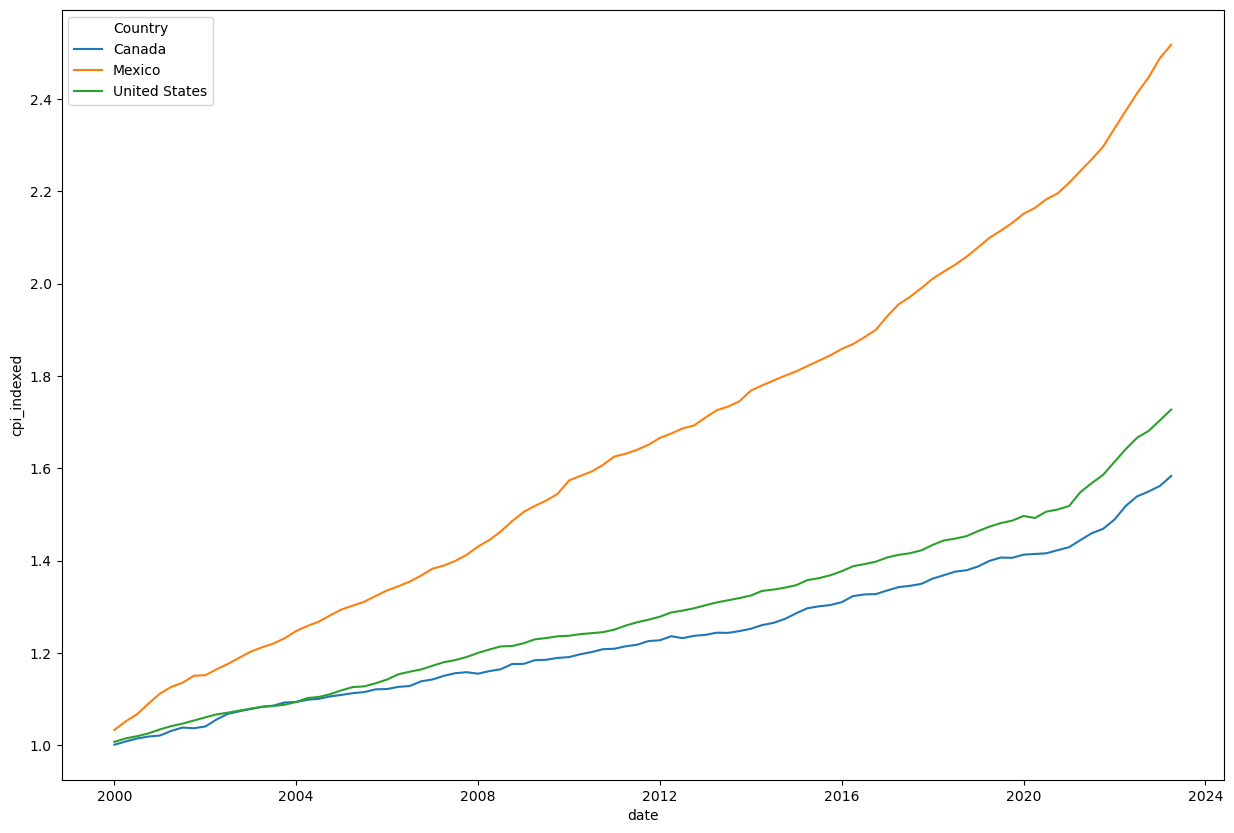

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize = (15,10))
df_temp =df_f[df_f['Region']=='Americas']
sns.lineplot(data =df_temp.reset_index().rename(columns = {'level_1':'date'}),x = 'date',hue = 'Country',y='cpi_indexed')
plt.show()

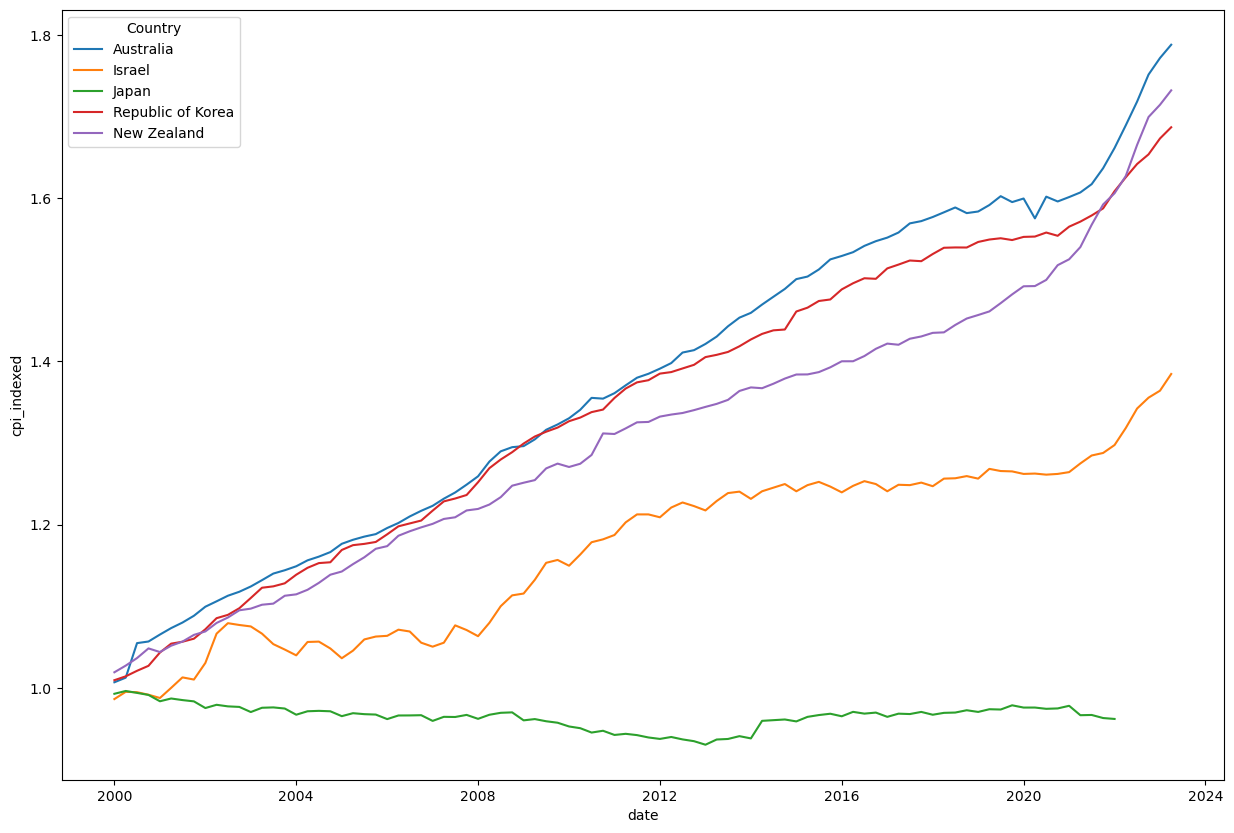

In [81]:
fig,ax = plt.subplots(figsize = (15,10))
df_temp =df_f[df_f['Region']=='APAC']
sns.lineplot(data =df_temp.reset_index().rename(columns = {'level_1':'date'}),x = 'date',hue = 'Country',y='cpi_indexed')
plt.show()

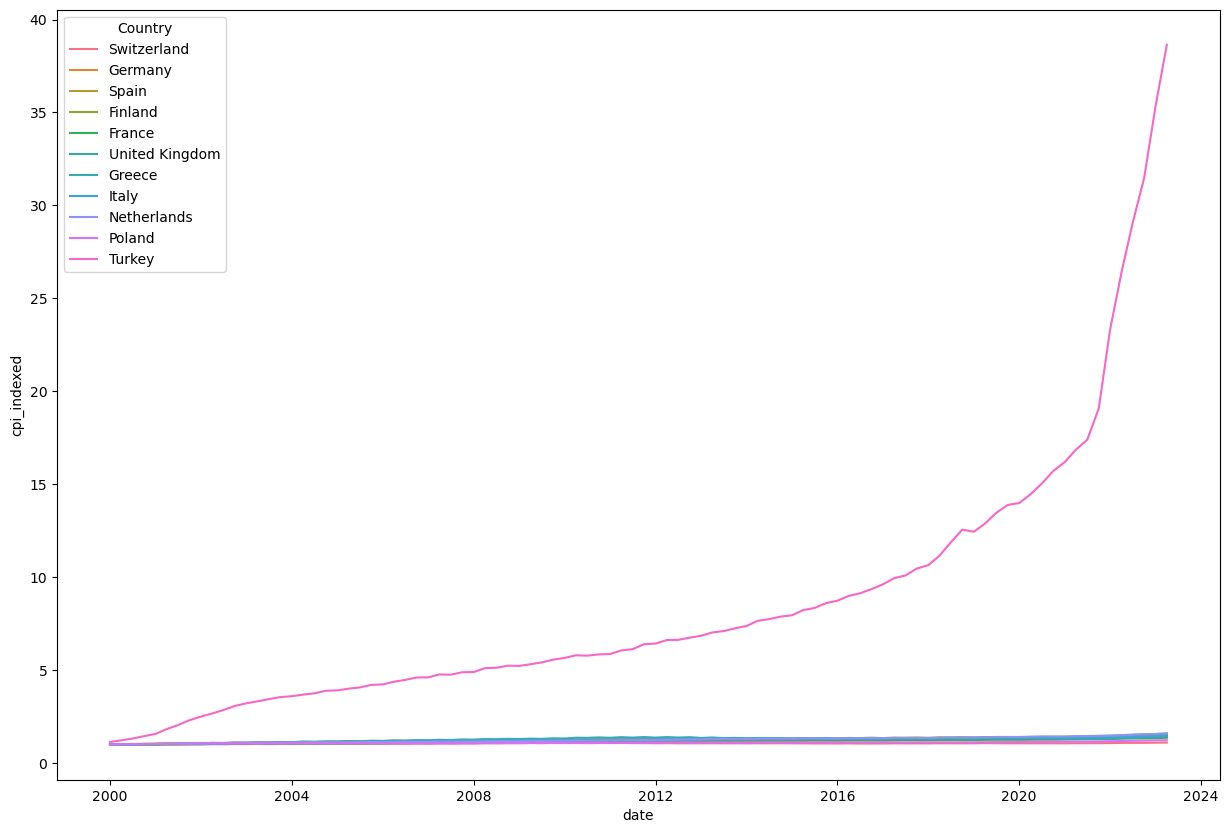

In [80]:
fig,ax = plt.subplots(figsize = (15,10))
df_temp =df_f[df_f['Region']=='Europe']
sns.lineplot(data =df_temp.reset_index().rename(columns = {'level_1':'date'}),x = 'date',hue = 'Country',y='cpi_indexed')
plt.show()

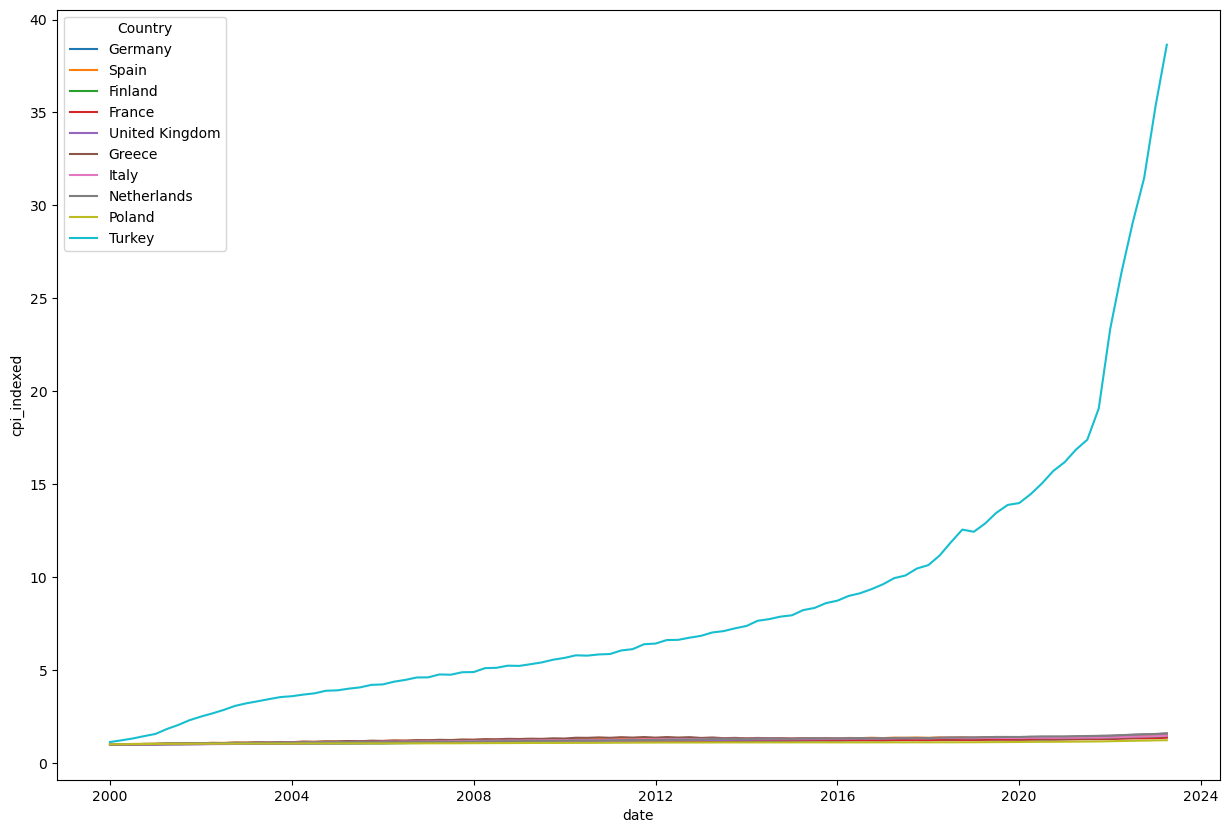

In [91]:
fig,ax = plt.subplots(figsize = (15,10))
df_temp =df_f[df_f['Region']=='Europe']
df_temp = df_temp[df_temp['id']!='CPGRLE01CHQ657N']
sns.lineplot(data =df_temp.reset_index().rename(columns = {'level_1':'date'}),x = 'date',hue = 'Country',y='cpi_indexed')
plt.show()

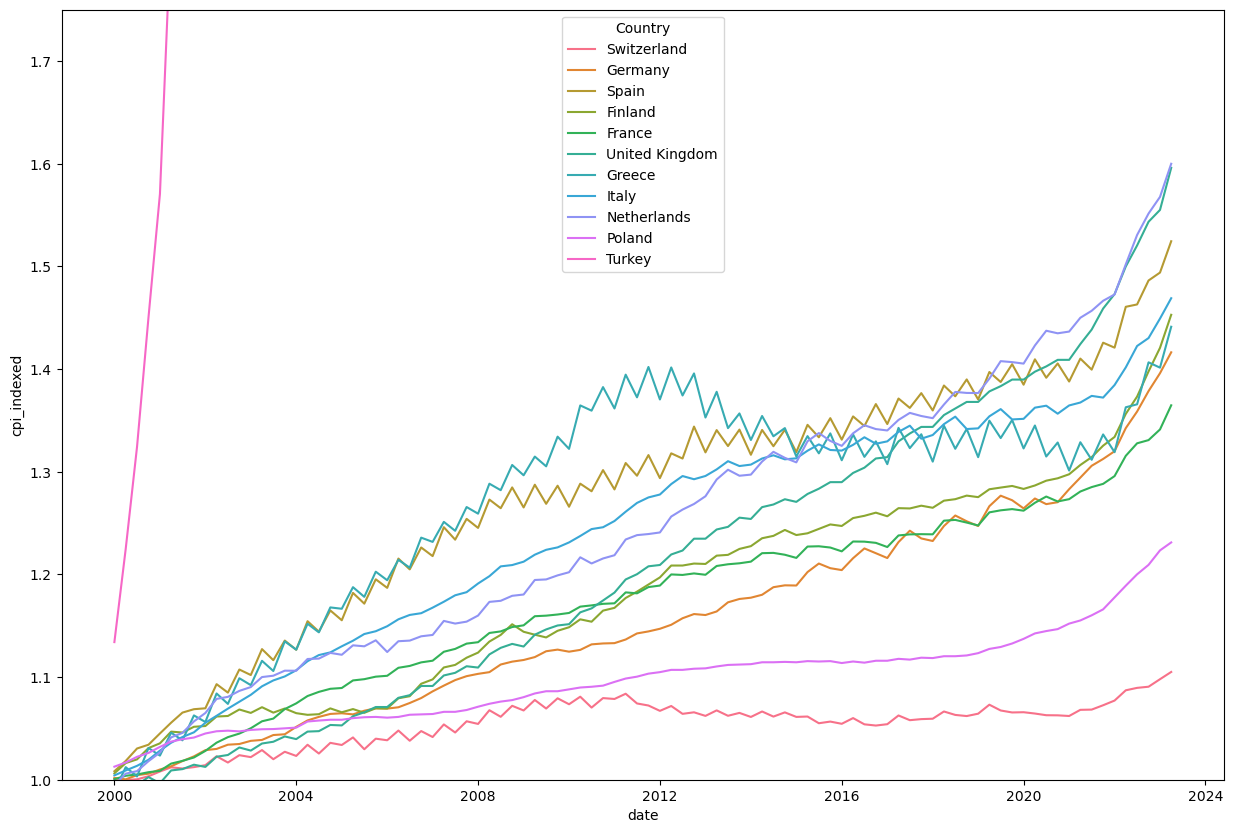

In [98]:
fig,ax = plt.subplots(figsize = (15,10))
df_temp =df_f[df_f['Region']=='Europe']
sns.lineplot(data =df_temp.reset_index().rename(columns = {'level_1':'date'}),x = 'date',hue = 'Country',y='cpi_indexed')
plt.ylim(1,1.75)
plt.show()

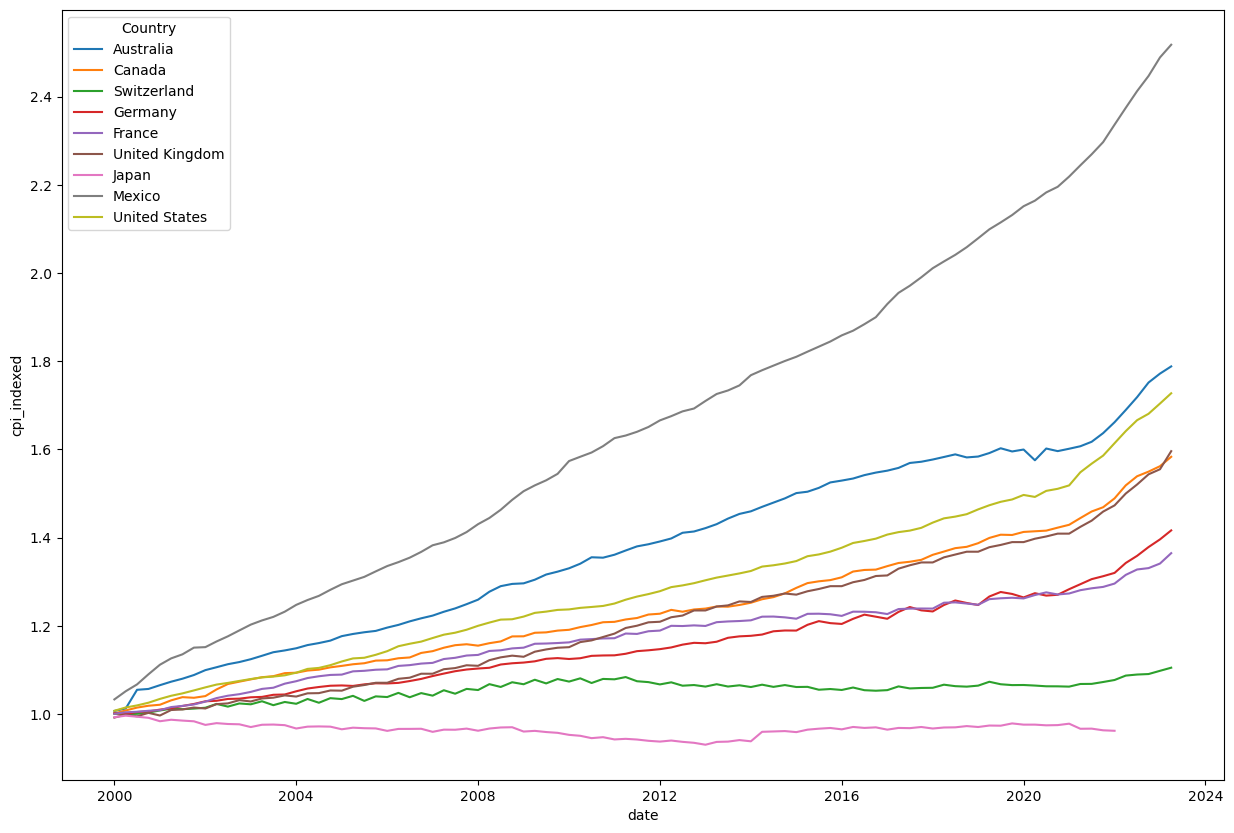

In [103]:
fig,ax = plt.subplots(figsize = (15,10))
df_ftemp = df_f.reset_index()
df_temp =df_ftemp[df_ftemp['Country'].isin(['United States','Germany','France','United Kingdom','Mexico','Canada','Switzerland','Japan','Australia'])]
sns.lineplot(data =df_temp.reset_index().rename(columns = {'level_1':'date'}),x = 'date',hue = 'Country',y='cpi_indexed')
plt.show()